In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

Matplotlib is building the font cache; this may take a moment.


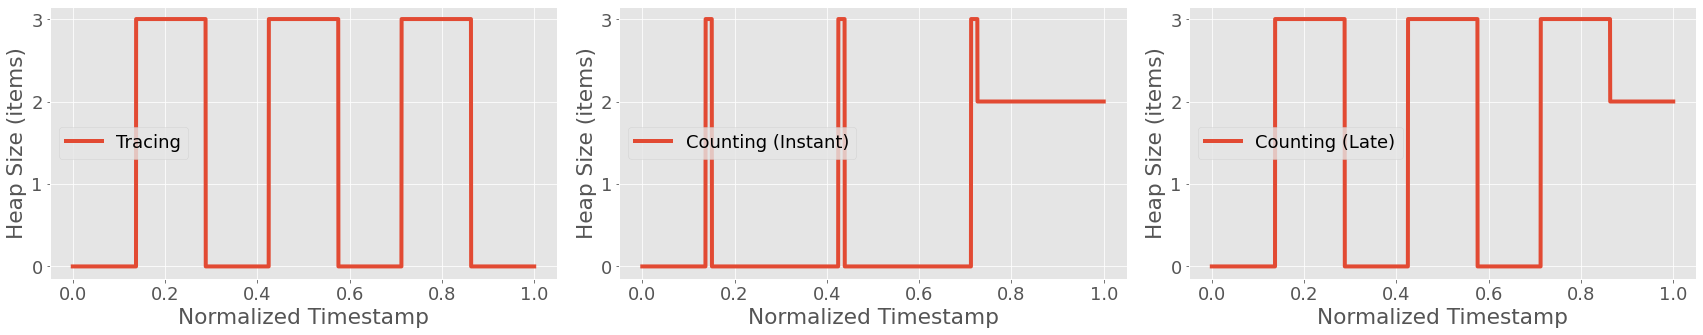

In [65]:
PATH = '../Logs/simple_test/'
filenames = [
    'simple_test_Tracing_BFS.csv', 
    'simple_test_Counting_Instant_BFS.csv',
    'simple_test_Counting_Late_BFS.csv'
]
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(24, 5), facecolor='white')
gs = fig.add_gridspec(1,3)
data = [pd.read_csv(PATH + filename) for filename in filenames]
ax = None
i = 0
for df, label in zip(data, ['Tracing', 'Counting (Instant)', 'Counting (Late)']):
    ax = fig.add_subplot(gs[:, i])
    i += 1
    df['Timestamp'] = df['Dt (μs)'].cumsum()
    df['Normalized Timestamp'] = df['Timestamp'] / df['Timestamp'].iloc[-1]
    ax = df.plot(x='Normalized Timestamp', y='HeapSize (items)',
                 ax=ax, label=label, linewidth=4, fontsize=18, yticks=np.arange(0, 3.1, 1))
    plt.ylabel('Heap Size (items)')
    plt.legend(loc='center left')
plt.tight_layout()
plt.savefig('../Plots/simple_test.png')
plt.show()